In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean
count,6607.0,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.0,6607.000000,6607.000000
mean,0.0,3303.000000,18.579386,1.877857,8.270017,0.071367,0.242367,0.0,23.859034,14.982036
std,0.0,1907.420946,14.231308,1.637364,16.641790,0.097173,0.211908,0.0,14.040880,9.089092
min,0.0,0.000000,1.000000,0.000000,-20.000000,0.050000,0.005338,0.0,0.000000,0.000000
25%,0.0,1651.500000,8.000000,1.000000,0.000000,0.050000,0.091645,0.0,12.930445,7.812258
50%,0.0,3303.000000,15.000000,2.000000,10.000000,0.050000,0.189859,0.0,21.113743,12.862164
75%,0.0,4954.500000,26.000000,3.000000,20.000000,0.050000,0.334440,0.0,32.415018,20.653534
max,0.0,6606.000000,115.000000,11.000000,100.000000,0.900000,1.862378,0.0,229.275864,133.390717


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean
0,0,0,0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean


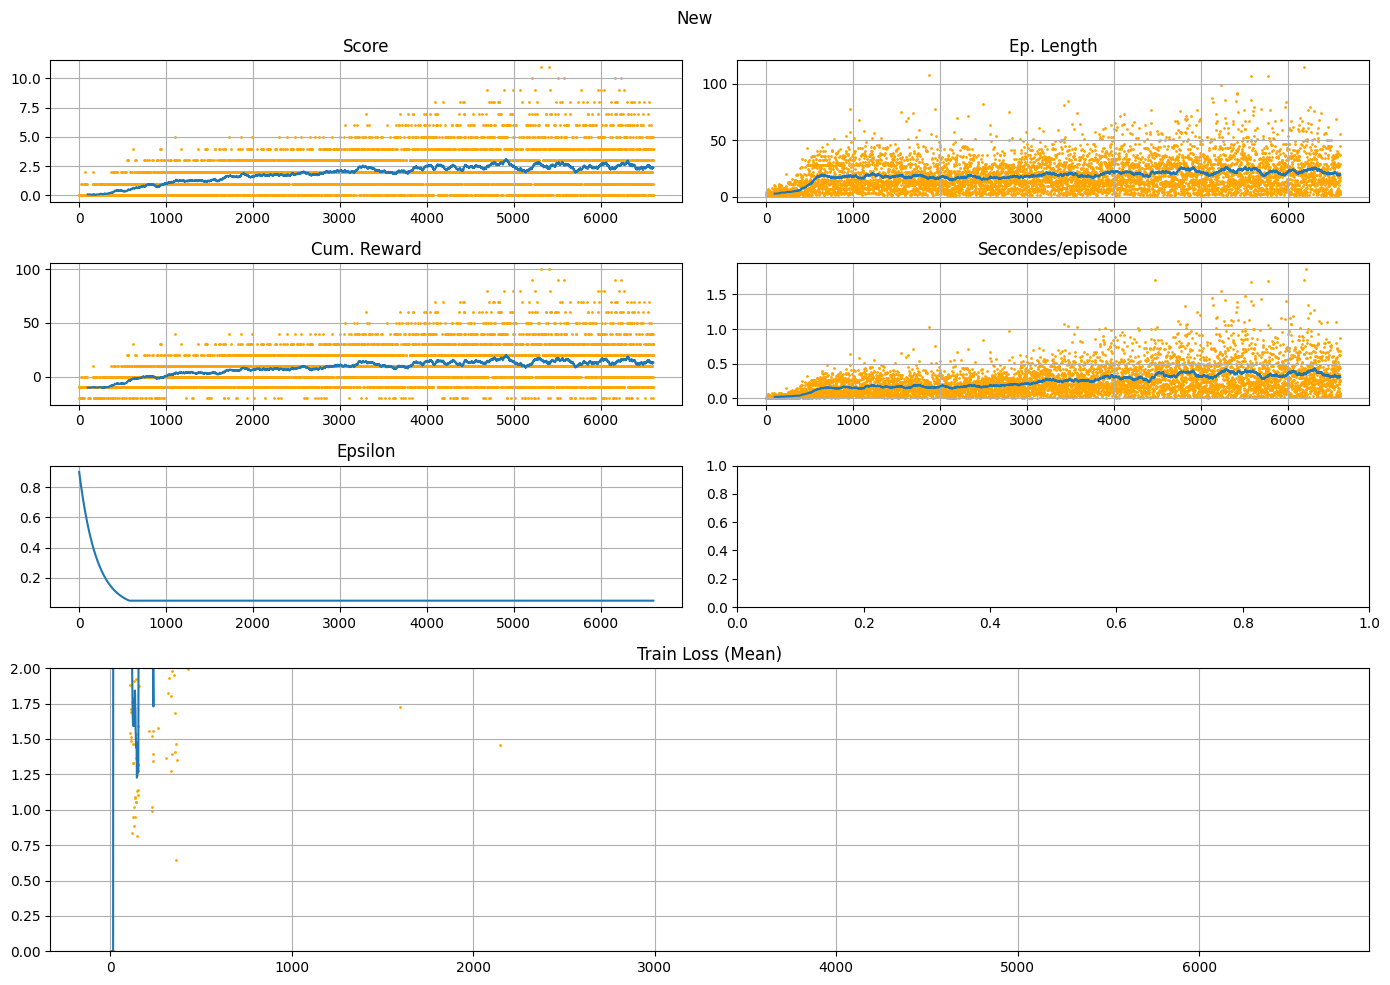

Total time: 1601.32
Max Score: 11 a 5313
Max Cum. Reward: 100.0 a 5313
Max Ep. Length: 115 a 6188


In [3]:
def graph(df, title, ROLLING=100, ylim=2):
    layout = [
        ["A", "B"],
        ["C", "D"],
        ["E", "F"],
        ["Z", "Z"]
    ]

    fig, ax = plt.subplot_mosaic(layout, figsize=(14, 10), height_ratios=[1, 1, 1, 2])

    ax["A"].plot(df.Episode, df.Score.rolling(ROLLING).mean())
    ax["A"].scatter(df.Episode, df.Score, s=1, color="orange")
    ax["A"].set_title("Score")
    ax["A"].grid()

    ax["B"].plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    ax["B"].scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    ax["B"].set_title("Ep. Length")
    ax["B"].grid()

    ax["C"].plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
    ax["C"].scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
    ax["C"].set_title("Cum. Reward")
    ax["C"].grid()

    ax["D"].plot(df.Episode, df.EpisodeDuration.rolling(ROLLING).mean())
    ax["D"].scatter(df.Episode, df.EpisodeDuration, s=1, color="orange")
    ax["D"].set_title("Secondes/episode")
    ax["D"].grid()

    ax["E"].plot(df.Episode, df.Epsilon)
    ax["E"].set_title("Epsilon")
    ax["E"].grid()

    ax["Z"].plot(df.Episode, df.TrainLossMean.rolling(ROLLING // 10).mean())
    ax["Z"].scatter(df.Episode, df.TrainLossMean, s=1, color="orange")
    ax["Z"].set_title("Train Loss (Mean)")
    ax["Z"].set_ylim([0, ylim])
    ax["Z"].grid()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())
    print("Max Ep. Length:", df.EpisodeLength.max(), "a", df.EpisodeLength.argmax())

# graph(df_base, "Base")
graph(df, "New")